<a href="https://colab.research.google.com/github/LuuNghiep333/COP2044C/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this analysis, we would examine the Titanic Classification with serveral method using Linear Regression, Logistic Regression and MLP Classifier and later explain factors causing the model failure.

This analysis is inspired by [Baligh Mnassri](https://www.kaggle.com/mnassrib)'s analysis about [Titanic: Logistic Regression with Python](https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python) with score is 0.76076.

# Data Preparation

## Import Libraries



In [50]:
# Core Libraries
import numpy as np # Linear Algebra
import pandas as pd # Data Processing, CSV Files I/O (e.g. pd.read_csv)
import statistics as stats # Data Inspection, (e.g. mode())

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

# Extra Libraries
import warnings
warnings.simplefilter(action='ignore')

## Import CSV Files

In [51]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# train.csv
train_raw_data = pd.read_csv("/content/drive/MyDrive/Coding Lesson/No-Code Courses/COP2044C/Final Project/train.csv", index_col = 'PassengerId')
# test.csv
test_raw_data = pd.read_csv("/content/drive/MyDrive/Coding Lesson/No-Code Courses/COP2044C/Final Project/test.csv", index_col = 'PassengerId')

Mounted at /content/drive


# Data Exploratory

## Data Dictionary

1. Pclass: Ticket Class
* 1 = 1st (Upper Class)
* 2 = 2nd (Mid Class)
* 3 = 3rd (Lower CLass)


2. SipSp: Number of siblings
* 1 or more = have siblings/spouses aboard the Titanic
* 0 = alone

3. Parch: Number of family members
* 1 or more = have parents/children aboard the Titanic
* 0 = alone

4. Embarked: Boarding Port
* C = Cherbourg
* Q = Queenstown
* S = Southampton

5. Survived (Only in train.csv)
* 0 = Death
* 1 = Alive

6. Other Attributes
* PassengerId: Designated by Data Provider
* Name: Name of Passengers
* Sex: Male or Female
* Age: Age in Years (Can be lesser than 1)
* Ticket: Ticket Number
* Fare: Passenger Fare
* Cabin: Cabin Number

## Overview of test.csv

In [52]:
#@title
# Overview of test.csv
test_raw_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [53]:
#@title
print('Dimension:', test_raw_data.shape)

test_duplicates = test_raw_data.duplicated().sum()
print("Duplicated Entries:", test_duplicates)

Dimension: (418, 10)
Duplicated Entries: 0


In [54]:
#@title
test_categoricalData = test_raw_data.select_dtypes(include=['object'])
print("Categorical Data: ",test_categoricalData.columns)

Categorical Data:  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [55]:
# Data Dictionary Notes for Categorical Data
print('Sex: ',test_raw_data['Sex'].unique())
print('Embarked: ',test_raw_data['Embarked'].unique())

Sex:  ['male' 'female']
Embarked:  ['Q' 'S' 'C']


In [56]:
#@title
test_numericalData = test_raw_data.select_dtypes(exclude=['object'])
print("Numerical Data: ",test_numericalData.columns)

Numerical Data:  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [57]:
# Data Dictionary Notes for Numerical Data
print('Pclass: ',test_raw_data['Pclass'].unique())
print('SibSp: ',test_raw_data['SibSp'].unique()) # Max is 8; Min = 0
print('Parch: ',test_raw_data['Parch'].unique()) # Max is 9; Min = 0

Pclass:  [3 2 1]
SibSp:  [0 1 2 3 4 5 8]
Parch:  [0 1 3 2 4 6 5 9]


In [58]:
# Statistic Info of test.csv
test_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [59]:
# Find Missing Values
test_missing = test_raw_data.isnull().sum()
pd.DataFrame(test_missing).transpose()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,86,0,0,0,1,327,0


## Overview of train.csv

In [60]:
# Overview of train.csv
train_raw_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [61]:
#@title
print('Dimension:', train_raw_data.shape)

train_duplicates = train_raw_data.duplicated().sum()
print("Duplicated Entries:", train_duplicates)

Dimension: (891, 11)
Duplicated Entries: 0


In [62]:
#@title
train_categoricalData = train_raw_data.select_dtypes(include=['object'])
print("Categorical Data: ",train_categoricalData.columns)

Categorical Data:  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [63]:
# Data Dictionary Notes for Categorical Data
print('Sex: ',train_raw_data['Sex'].unique())
print('Embarked: ',train_raw_data['Embarked'].unique())

Sex:  ['male' 'female']
Embarked:  ['S' 'C' 'Q' nan]


In [64]:
#@title
train_numericalData = train_raw_data.select_dtypes(exclude=['object'])
print("Numerical Data: ",train_numericalData.columns)

Numerical Data:  Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [65]:
# Data Dictionary Notes for Numerical Data
print('Pclass: ',train_raw_data['Pclass'].unique())
print('Survived: ',train_raw_data['Survived'].unique()) # 0 = Death; 1 = Alive
print('SibSp: ',train_raw_data['SibSp'].unique()) # Max is 8; Min = 1
print('Parch: ',train_raw_data['Parch'].unique()) # Max is 6; Min = 0

Pclass:  [3 1 2]
Survived:  [0 1]
SibSp:  [1 0 3 4 2 5 8]
Parch:  [0 1 2 5 3 4 6]


In [66]:
# Statistic Info of train.csv
train_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [67]:
# Find Missing Values
train_missing = train_raw_data.isnull().sum()
pd.DataFrame(train_missing).transpose()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,177,0,0,0,0,687,2


# Data Inspection



## Data Redundant Extraction

Before starting data analysis, some attributes are determined to be extracted to achieve better goals.

* "Ticket": These attributes do not have any connection to the survival rate of the passengers. The only relevancy is the relation to the passengers' class. As if the dataset has this information, "Ticket" are redundant.
* "Cabin": It is pointless to use this attribute to analyze the death rate as it has large number of missing values and can only show the passengers' location on the ship.

In [68]:
# Remove 2 Redundant Columns
test_refix_data = test_raw_data.drop(['Ticket', 'Cabin'], axis=1)
test_refix_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S


In [69]:
# Remove 2 Redundant Columns
train_refix_data = train_raw_data.drop(['Ticket', 'Cabin'], axis=1)
train_refix_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S


## Inspection Details

This process will determine filling missing values of some attributes and briefly guess the relationship between them. Then, we will check if the refixed datasets are skewed or not.

After that,  test_refix_data and train_refix_data will be transferred into filled datasets in the next section for the following step.

In [70]:
# Find Missing Values of test_refix_data in Percentage
test_refix_missing = test_refix_data.isnull().sum()
test_refix_missing_percentage = (test_refix_missing / len(test_refix_data)) * 100
pd.DataFrame(test_refix_missing_percentage).transpose()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,0.0,0.0,20.574163,0.0,0.0,0.239234,0.0


In [71]:
# Find Missing Values of train_refix_data in Percentage
train_refix_missing = train_refix_data.isnull().sum()
train_refix_missing_percentage = (train_refix_missing / len(train_refix_data)) * 100
pd.DataFrame(train_refix_missing_percentage).transpose()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.224467


Roundly 20% of entries in "Age" and 1% of entries in "Embarked" contain missing values.

Next, we might check which method is suitable to fill those empty gaps. We can either use mean() to find average age, median() to find most frequent age, and mode to check most frequent letter in "Embarked".

In addition, we also need to use value_counts() to ensure which values are the most frequent in each column.

Besides, it is important to not include null values when using mean() and median() if there are too many null values in the dataset.

In [72]:
# Mean, Median of Age in test_refix_data
print("Mean of Age: ", test_refix_data['Age'].mean(skipna=True))
print("Median of Age: ", test_refix_data['Age'].median(skipna=True))

# Age Lists in train_refix_data
print("--- Most Frequent Age ---")
test_age = test_refix_data['Age'].value_counts(dropna=True)
test_age_lists = pd.DataFrame(test_age).head(3)
test_age_lists.rename(columns={'Age': 'Counts'}).transpose()

Mean of Age:  30.272590361445783
Median of Age:  27.0
--- Most Frequent Age ---


Age,21.0,24.0,22.0
count,17,17,16


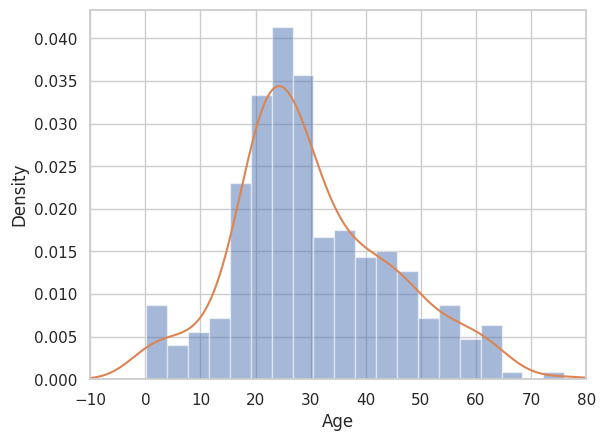

In [73]:
# Age Visualization in test_refix_data
ax = test_refix_data['Age'].hist(bins=20, density=True, stacked=True, alpha=0.5)
test_refix_data['Age'].plot(kind='density')
ax.set(xlabel='Age')
plt.xlim(-10,80)
plt.show()

In [74]:
# Mean and Median of Age in train_refix_data
print('Mean of Age: ', train_refix_data['Age'].mean(skipna=True))
print('Median of Age: ', train_refix_data['Age'].median(skipna=True))

# Age Lists in train_refix_data
print("--- Most Frequent Age ---")
train_age = train_refix_data["Age"].value_counts(dropna=True)
train_age_lists = pd.DataFrame(train_age).head(3)
train_age_lists.rename(columns={'Age': 'Counts'}).transpose()

Mean of Age:  29.69911764705882
Median of Age:  28.0
--- Most Frequent Age ---


Age,24.0,22.0,18.0
count,30,27,26


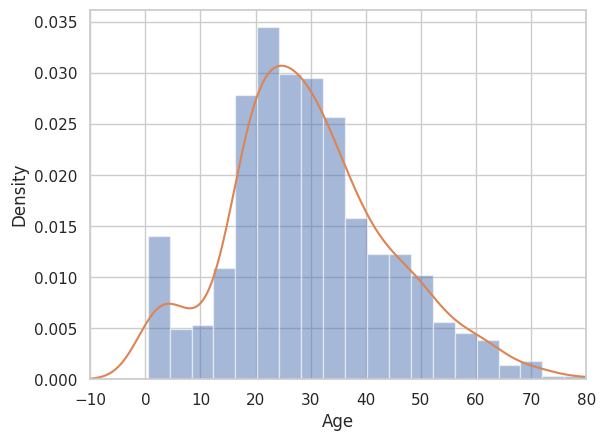

In [75]:
# Age Visualization in train_refix_data
ax = train_refix_data['Age'].hist(bins=20, density=True, stacked=True, alpha=0.5)
train_refix_data['Age'].plot(kind='density')
ax.set(xlabel='Age')
plt.xlim(-10,80)
plt.show()

Both the refixed dataset have some common patterns that both are left-skewed dataset.

In both bar charts, in the range of 20 to 30, the highest rate is at the center-left (around 25 in test_refix_data and just surpassing 20 in train_refix_data). The left side in both datasets is higher than the right side.

In test_refix_data, most passengers were 21 or 24, while the mean age was around 30 and the median was 27. Like train_refix_data, most passengers were 22 or 24, while the mean age was around 29 and the median was 28.

Therefore, we should use median as the standard rate (no lower than 20 and no surpass than the center of the range).

In [76]:
# Mode of Embarked
print('Most Frequent Letter in test_refix_data[Embarked]: ', stats.mode(test_refix_data['Embarked']))
print('Most Frequent Letter in train_refix_data[Embarked]: ', stats.mode(train_refix_data['Embarked']))

Most Frequent Letter in test_refix_data[Embarked]:  S
Most Frequent Letter in train_refix_data[Embarked]:  S




Most of passengers' destination is Southampton (S). Therefore, we can fill the null values of 'Embarked' is S.



# Data Adjustments

Based on [data inspection](https://colab.research.google.com/drive/1W1MnkNyMuWnuHNpBwfqE8-TtTt6uk1oS#scrollTo=j-EoizDkhtIG), I will use the median to fill in missing data in "Age" and the mode for missing data in "Embarked". Next, in the 'Age' column, I will compare between refixed version and the filled version to consider if the filled datasets are no longer skewed.

## Overview of test_data_filled

In [77]:
#@title
# Filling Null Values of test_refix_data
test_data_filled = test_refix_data.copy()
test_data_filled['Age'].fillna(test_refix_data['Age'].median(skipna=True), inplace=True)
test_data_filled['Embarked'].fillna(stats.mode(test_refix_data['Embarked']), inplace=True)
test_data_filled

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,27.0,0,0,8.0500,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S


In test.csv, [only 1 entry has an unknown fare](https://colab.research.google.com/drive/1W1MnkNyMuWnuHNpBwfqE8-TtTt6uk1oS#scrollTo=Qy37_y5_NEQw&line=3&uniqifier=1). We can predict it by checking the average fares of the passenger class that the passenger ordered.

In [78]:
# Find the Passenger has Unknown Fare
test_data_filled[test_data_filled['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


In [79]:
# Find Average fares of Passenger Class 3
test_filled_Pclass3 = test_data_filled['Fare'].where(test_data_filled['Pclass'] == 3)
print("Average Fare for Class 3: ",test_filled_Pclass3.mean(skipna=True))

Average Fare for Class 3:  12.459677880184334


In [80]:
# Replace Unknown fare
test_data_filled['Fare'].fillna(test_filled_Pclass3.median(skipna=True), inplace=True)

In [81]:
# Check Null Values of test_data_filled
pd.DataFrame(test_data_filled.isnull().sum()).transpose()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,0,0,0,0,0,0


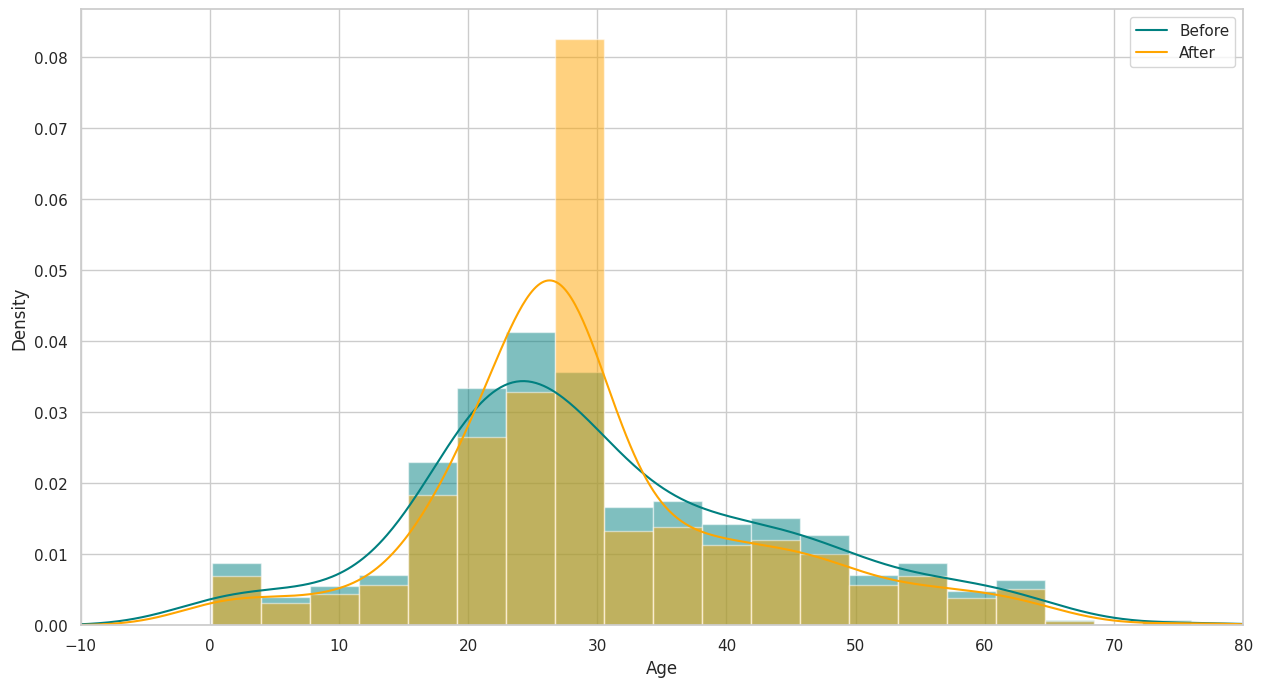

In [82]:
# Comparison bettween test_data_filled and test_refix_data
plt.figure(figsize=(15,8))
ax = test_refix_data["Age"].hist(bins=20, density=True, stacked=True, color='teal', alpha=0.5)
test_refix_data["Age"].plot(kind='density', color='teal')
ax = test_data_filled["Age"].hist(bins=20, density=True, stacked=True, color='orange', alpha=0.5)
test_data_filled['Age'].plot(kind='density', color='orange')
ax.legend(['Before', 'After'])
ax.set(xlabel='Age')
plt.xlim(-10,80)
plt.show()

## Overview of train_data_filled

In [83]:
#@title
# Filling Null Values of train_refix_data
train_data_filled = train_refix_data.copy()
train_data_filled['Age'].fillna(train_refix_data["Age"].median(skipna=True), inplace=True)
train_data_filled['Embarked'].fillna(stats.mode(train_refix_data['Embarked']), inplace=True)
train_data_filled

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S


In [84]:
# Check Null Values of train_data_filled
pd.DataFrame(train_data_filled.isnull().sum()).transpose()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,0,0,0,0,0,0,0


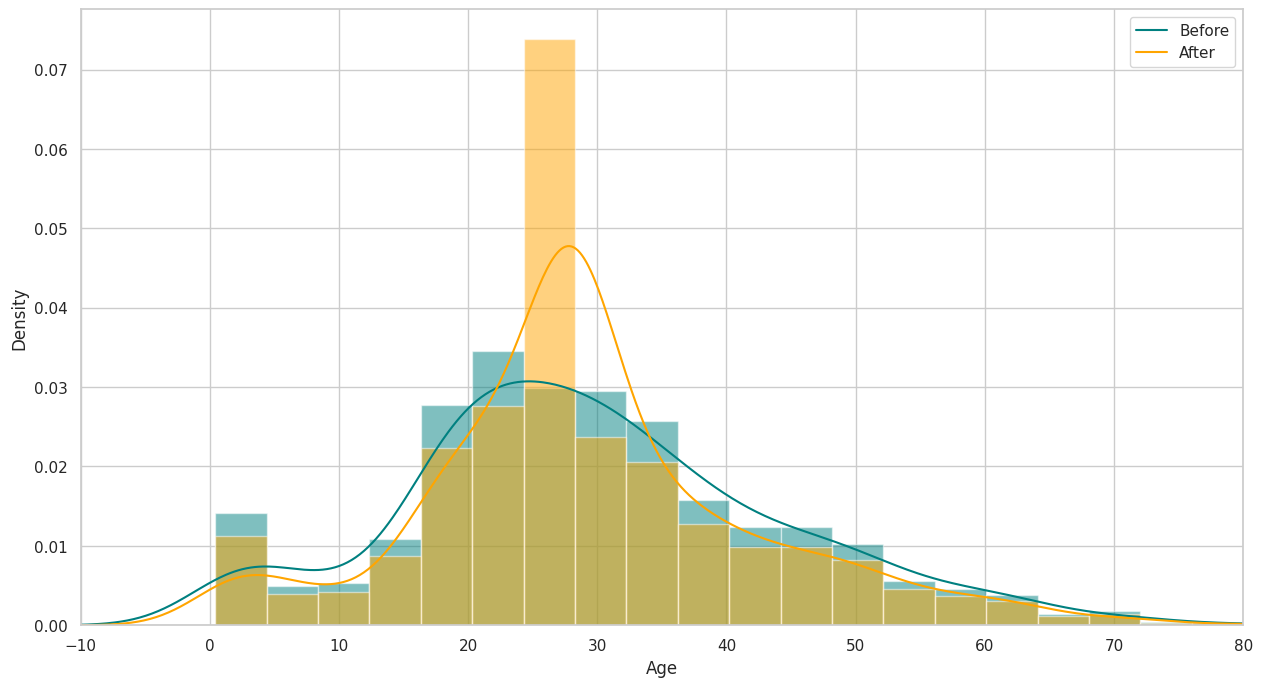

In [85]:
# Comparison bettween train_data_filled and train_refix_data
plt.figure(figsize=(15,8))
ax = train_refix_data["Age"].hist(bins=20, density=True, stacked=True, color='teal', alpha=0.5)
train_refix_data["Age"].plot(kind='density', color='teal')
ax = train_data_filled["Age"].hist(bins=20, density=True, stacked=True, color='orange', alpha=0.5)
train_data_filled['Age'].plot(kind='density', color='orange')
ax.legend(['Before', 'After'])
ax.set(xlabel='Age')
plt.xlim(-10,80)
plt.show()

## Additional Changes

Both "SibSp" and "Parch" are related to members traveling with passengers. We can combine them into 1 categorical attribute "TravelAlone" to determine if that passenger was traveling alone or not.

In addition, we can divide "Pclass", "Sex", and "Embarked" into smaller groups and drop "Name" and "PassengerId" for better analysis.

In [86]:
#@title
# Create categorical variable in test_data_filled
#1 Replace "SibSp" and "Parch" into "TravelAlone"
test_data_filled['TravelAlone']=np.where((test_data_filled['SibSp']+test_data_filled['Parch']) > 0, 0, 1)
test_data_filled.drop('SibSp', axis=1, inplace=True)
test_data_filled.drop('Parch', axis=1, inplace=True)

#2 Divide "Pclass", "Sex", and "Embarked" into smaller groups
test = pd.get_dummies(test_data_filled, columns=["Pclass","Embarked","Sex"])

#3 Drop "Name", and "Sex_male"
test.drop('Name', axis=1, inplace=True)
test.drop('Sex_male', axis=1, inplace=True)
test

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female
PassengerId,,,,,,,,,,
892,34.5,7.8292,1,False,False,True,False,True,False,False
893,47.0,7.0000,0,False,False,True,False,False,True,True
894,62.0,9.6875,1,False,True,False,False,True,False,False
895,27.0,8.6625,1,False,False,True,False,False,True,False
896,22.0,12.2875,0,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
1305,27.0,8.0500,1,False,False,True,False,False,True,False
1306,39.0,108.9000,1,True,False,False,True,False,False,True
1307,38.5,7.2500,1,False,False,True,False,False,True,False


In [87]:
#@title
# Create categorical variable in train_data_filled
#1 Replace "SibSp" and "Parch" into "TravelAlone"
train_data_filled['TravelAlone']=np.where((train_data_filled['SibSp']+train_data_filled['Parch']) > 0, 0, 1)
train_data_filled.drop('SibSp', axis=1, inplace=True)
train_data_filled.drop('Parch', axis=1, inplace=True)

#2 Divide "Pclass", "Sex", and "Embarked" into smaller groups
train = pd.get_dummies(train_data_filled, columns=["Pclass","Embarked","Sex"])

#3 Drop "Name", and "Sex_male"
train.drop('Name', axis=1, inplace=True)
train.drop('Sex_male', axis=1, inplace=True)
train

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female
PassengerId,,,,,,,,,,,
1,0,22.0,7.2500,0,False,False,True,False,False,True,False
2,1,38.0,71.2833,0,True,False,False,True,False,False,True
3,1,26.0,7.9250,1,False,False,True,False,False,True,True
4,1,35.0,53.1000,0,True,False,False,False,False,True,True
5,0,35.0,8.0500,1,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,13.0000,1,False,True,False,False,False,True,False
888,1,19.0,30.0000,1,True,False,False,False,False,True,True
889,0,28.0,23.4500,0,False,False,True,False,False,True,True


# Data Analysis

## 1. Exploration of "Age"

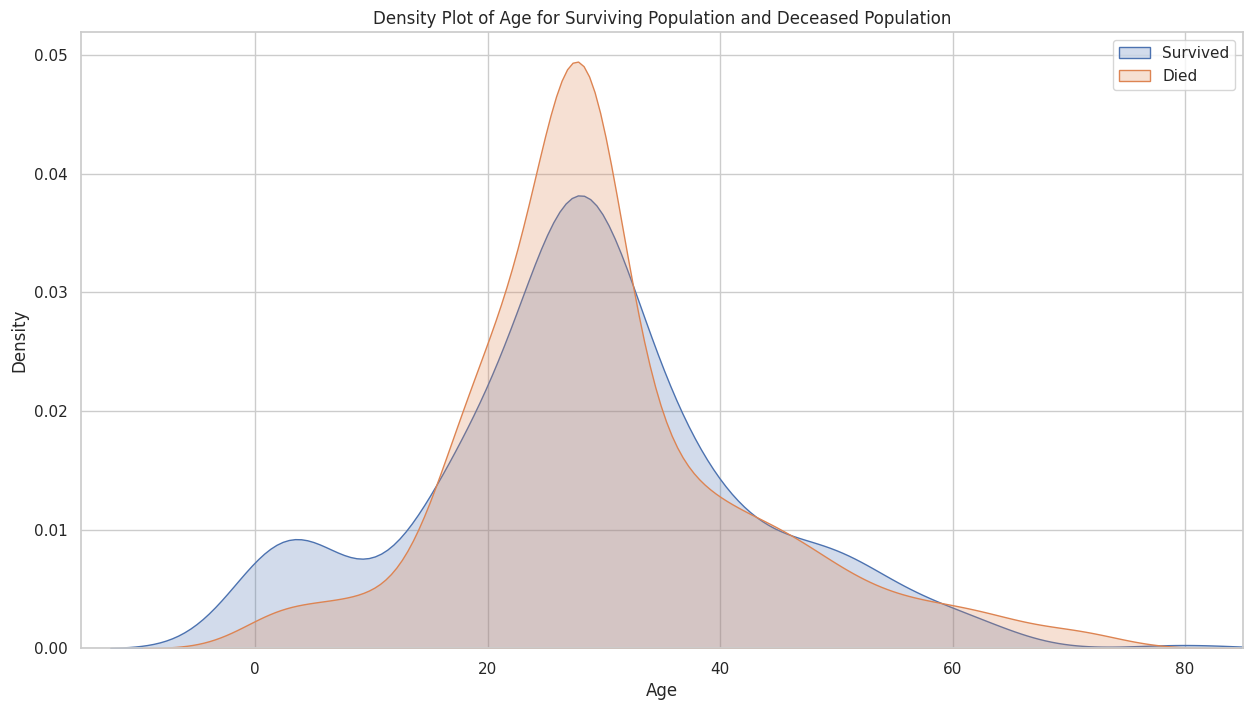

In [88]:
#@title
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["Age"][train.Survived == 1], shade=True)
sns.kdeplot(train["Age"][train.Survived == 0], shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-15,85)
plt.show()

The age distribution of survivors and those who died were very similar. Notably, among those who survived were children, while a higher proportion of those who died was between 20 and 30 years old.

The passengers gave a higher priority to saving children than saving ages over 50, yet there was still a significant death rate for ages lower than 10.

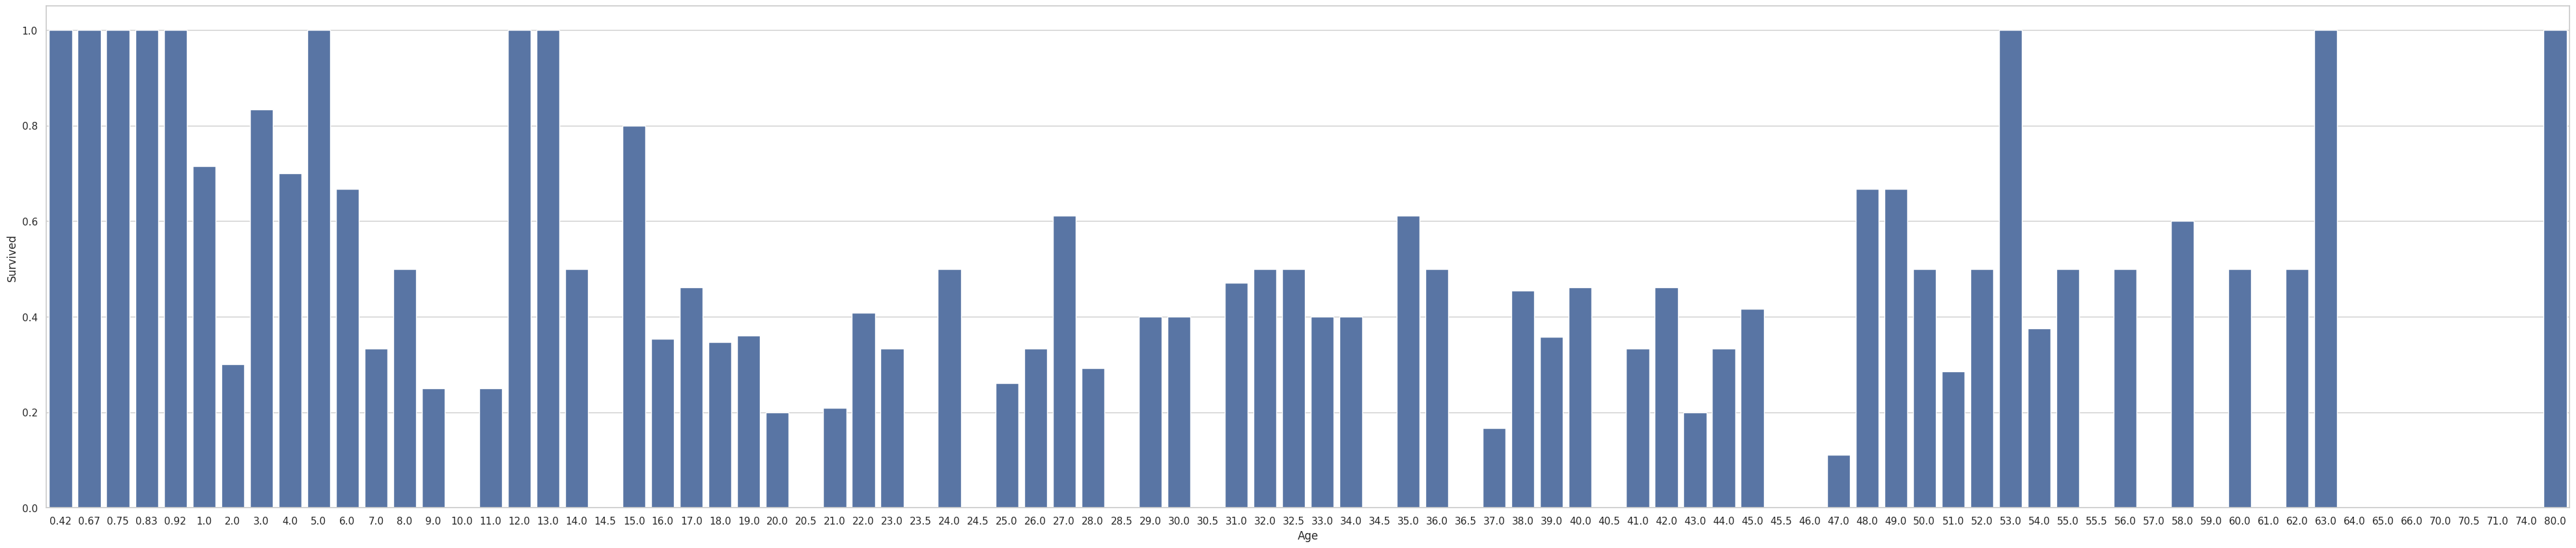

In [89]:
#@title
plt.figure(figsize=(50,10))
avg_survival_byage = train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage)
plt.show()

Based on the bar charts above, the survival rate of the age group under 14, the age group around 50 and 60, and the age group at 80 have a higher possibility. We should consider the possibility to live of other age groups since the age group under 14 has a higher rate than remainders at age 15 to 50.



## 2. Exploration of "Fare" and "Pclass"

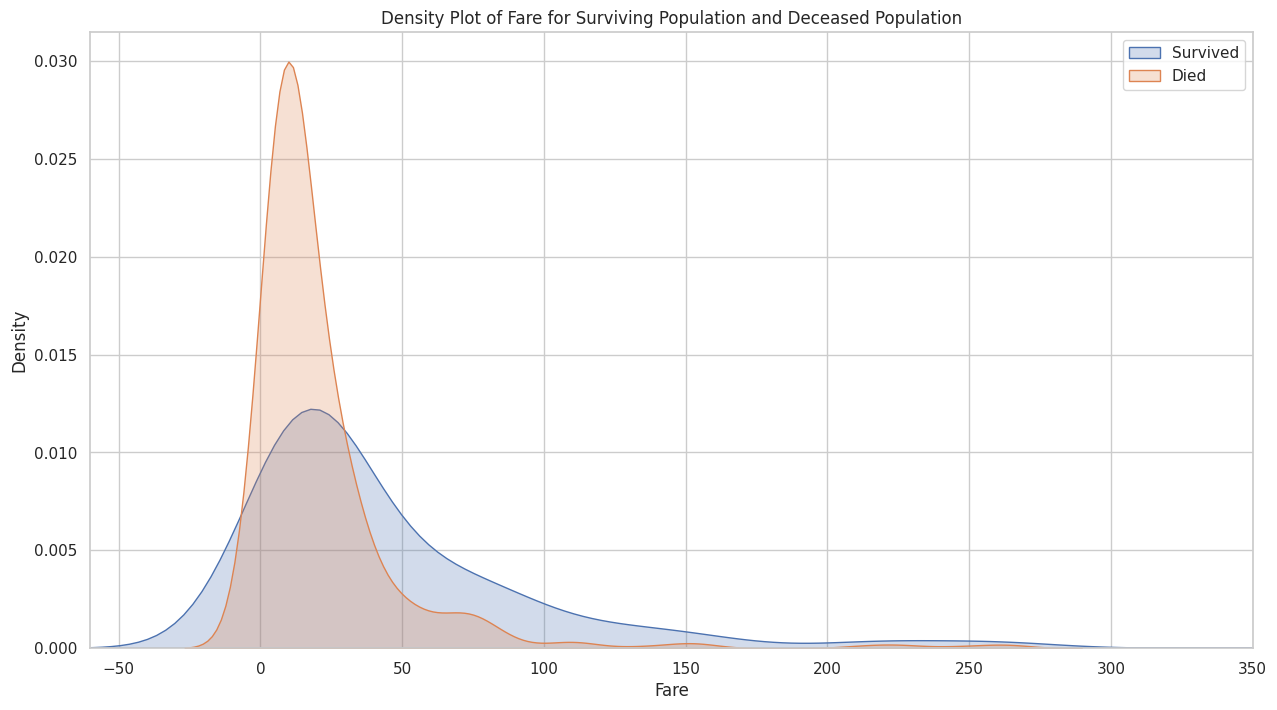

In [90]:
#@title
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["Fare"][train.Survived == 1], shade=True)
sns.kdeplot(train["Fare"][train.Survived == 0], shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-60,350)
plt.show()

It's likely affect significant predictor in our final model since passengers who paid lower fare were less likely to survive. This is probably strongly correlated with Passenger Class.

Besides, we are unsure if "Fare" causes bias since the cost of tickets could be frustrating, depending on certain events. For instance, if the Titanic ran out of seats and was only available for passengers in class 1, the cost could rise unpredictably, even higher than class 3.

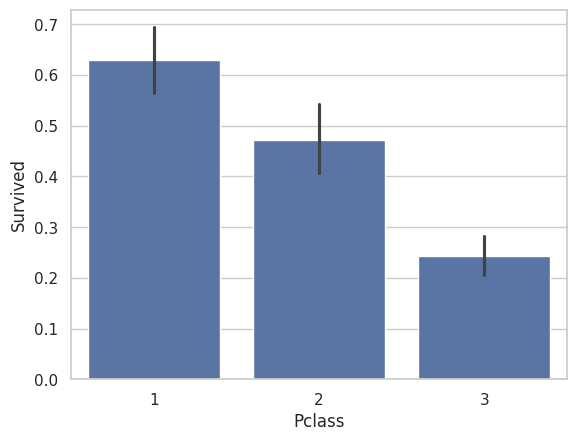

In [91]:
#@title
sns.barplot(x='Pclass', y='Survived', data=train_data_filled)
plt.show()

In [92]:
#@title
# Find Max of each Passenger Class
train_Pclass1 = test['Fare'].where(test_data_filled['Pclass'] == 1)
train_Pclass2 = test['Fare'].where(test_data_filled['Pclass'] == 2)
train_Pclass3 = test['Fare'].where(test_data_filled['Pclass'] == 3)

print("Max Fare for Class 1: ", train_Pclass1.max())
print("Max Fare for Class 2: ", train_Pclass2.max())
print("Max Fare for Class 3: ", train_Pclass3.max())

Max Fare for Class 1:  512.3292
Max Fare for Class 2:  73.5
Max Fare for Class 3:  69.55


It is unsurprised that 1st class was safest as it has the highest fare.

## 3. Exploration of "Embarked"

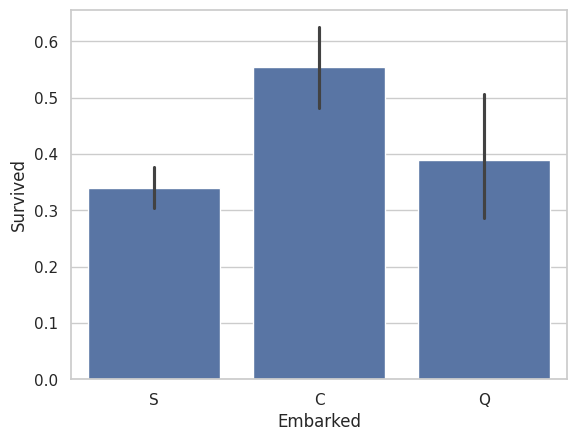

In [93]:
#@title
sns.barplot(x='Embarked', y='Survived', data=train_data_filled)
plt.show()

Passengers who boarded in Cherbourg (C) had the highest survival rate. The factor can relate to the seating order of the passengers, which associate with passengers class (Pclass).

## 4. Exploration of "TravelAlone" and "Sex"

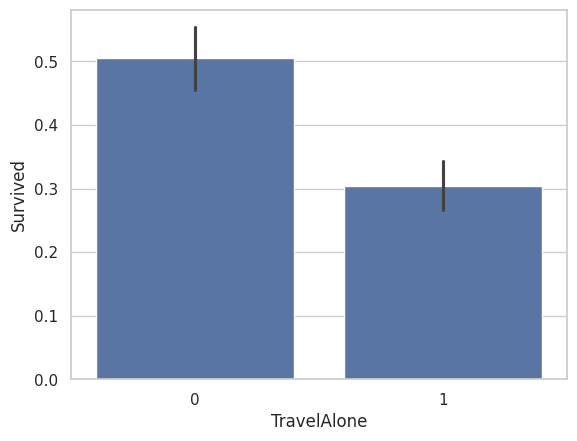

In [94]:
#@title
sns.barplot(x='TravelAlone', y='Survived', data=train)
plt.show()

Passengers traveling with members had a higher opportunity to survive. This is due to the [higher priority of saving children](https://colab.research.google.com/drive/1W1MnkNyMuWnuHNpBwfqE8-TtTt6uk1oS#scrollTo=QS_nqIVH7Jp2). Therefore, we can consider that the deceased must be at adult age or middle age, whereas the survivors who had children were either elderly or mothers (It is obvious to guess why).

There was an additional note that the crew members must be the last to leave the ship to ensure the passenger's safety. According to [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/titanic-crew-list/), most crew members were male at the age of 20 to 40.

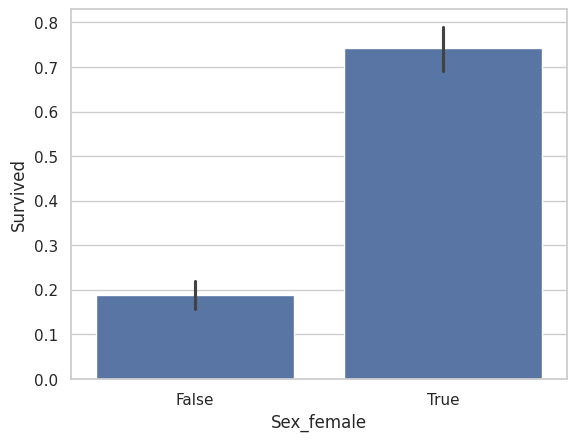

In [95]:
#@title
sns.barplot(x='Sex_female', y='Survived', data=train)
plt.show()

From the second barplot above, we can convince that most survivors were females (sex_female = 1).

# Applying Models with "Fare"

From Baligh Mnassri's analysis in [feature selection](https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python?scriptVersionId=26445092&cellId=63), his selected features by using Recursive Feature Elimination (RFE) and attribute "Fare" was eliminated. For general concept, to determine if "Fare" should be eliminated, we would test models with "Fare" instead of using RFE.

To begin the application of the model, I will split it into 2 models (all selective features). Selective features will cross out Pclass3 and Embarked S since they are lower rates. For scoring, we would import most mertrics from sklrean.metris. For better understanding about sklrean.metris and train_test_split check out this reference below.

---
Reference:

sklrean.metris: https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [96]:
from sklearn.model_selection import train_test_split
# Find Accuracy of Models and check errors
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.metrics import r2_score # Setup for linear regression
from sklearn.metrics import f1_score # Setup for logistic regression and

# Send data into final datasets
final_train = train

# Create 'IsMinor' column
final_train['IsMinor'] = np.where(final_train['Age'] < 14, 1, 0)

# Set features and target for final datasets
all_features = final_train.columns[1:]
select_features = ['Age', 'Fare', 'TravelAlone', 'IsMinor', 'Pclass_1', 'Pclass_2',       'Embarked_Q',   'Embarked_C',   'Sex_female']
y = final_train['Survived'] # y represents the target

## x1 represents all features
x1 = final_train[all_features]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2, random_state=0)

## x2 represents selective features
x2 = final_train[select_features]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.2, random_state=0)

For brief concept of RFE, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

---

Reference of RFE: http://scikit-learn.org/stable/modules/feature_selection.html


## Method 1: Linear Regression

Linear Regression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

---

Reference of Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### All Feature Model with Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

# 1st Attempt with all features
linear_reg.fit(x1_train, y1_train)
linear_reg_pred = linear_reg.predict(x1_test)
linear_reg_pred_class = [1 if i > 0 else 0 for i in linear_reg_pred]

# Calculate the accuracy of the best estimator
linear_reg_acc = accuracy_score(y1_test, linear_reg_pred_class)
print("Linear Regression Accuracy: ", linear_reg_acc)

# Calculate other evaluation metrics
linear_reg_precision = precision_score(y1_test,linear_reg_pred_class, average='weighted')
print("Linear Regression Precision: ", linear_reg_precision)

linear_reg_recall = recall_score(y1_test, linear_reg_pred_class, average='weighted')
print("Linear Regression Recall: ", linear_reg_recall)

logistic_reg_f1 = f1_score(y1_test, linear_reg_pred_class, average='weighted')
print("Logistic Regression F1 Score: ", logistic_reg_f1)

linear_reg_mse = mean_squared_error(y1_test, linear_reg_pred)
print("Linear Regression MSE: ", linear_reg_mse)

linear_reg_mae = mean_absolute_error(y1_test, linear_reg_pred)
print("Linear Regression MAE: ", linear_reg_mae)

linear_reg_r2 = r2_score(y1_test, linear_reg_pred)
print("Linear Regression R2: ", linear_reg_r2)

Linear Regression Accuracy:  0.39664804469273746
Linear Regression Precision:  0.7647950004734401
Linear Regression Recall:  0.39664804469273746
Logistic Regression F1 Score:  0.23818932123878306
Linear Regression MSE:  0.13513790997607886
Linear Regression MAE:  0.28255730703511145
Linear Regression R2:  0.4295186069112593


In [98]:
# Evaluate Model based on Confusion Matrix
linear_reg_confusion_matrix = confusion_matrix(y1_test, linear_reg_pred_class)
print("Linear Regression Confusion Matrix: ")
pd.DataFrame(linear_reg_confusion_matrix)

Linear Regression Confusion Matrix: 


,0,1
0,2,108
1,0,69


In [99]:
tn, fp, fn, tp = linear_reg_confusion_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  1.0
Specificity:  0.01818181818181818


### Selective Feature Model with Linear Regression

In [100]:
# 2nd Attempt with selective features
linear_reg.fit(x2_train, y2_train)
linear_reg_pred = linear_reg.predict(x2_test)
linear_reg_pred_class = [1 if i > 0 else 0 for i in linear_reg_pred]

# Calculate the accuracy of the best estimator
linear_reg_acc = accuracy_score(y2_test, linear_reg_pred_class)
print("Linear Regression Accuracy: ", linear_reg_acc)

# Calculate other evaluation metrics
linear_reg_precision = precision_score(y2_test,linear_reg_pred_class, average='weighted')
print("Linear Regression Precision: ", linear_reg_precision)

linear_reg_recall = recall_score(y2_test, linear_reg_pred_class, average='weighted')
print("Linear Regression Recall: ", linear_reg_recall)

logistic_reg_f1 = f1_score(y2_test, linear_reg_pred_class, average='weighted')
print("Logistic Regression F1 Score: ", logistic_reg_f1)

linear_reg_mse = mean_squared_error(y2_test, linear_reg_pred)
print("Linear Regression MSE: ", linear_reg_mse)

linear_reg_mae = mean_absolute_error(y2_test, linear_reg_pred)
print("Linear Regression MAE: ", linear_reg_mae)

linear_reg_r2 = r2_score(y2_test, linear_reg_pred)
print("Linear Regression R2: ", linear_reg_r2)

Linear Regression Accuracy:  0.39664804469273746
Linear Regression Precision:  0.7647950004734401
Linear Regression Recall:  0.39664804469273746
Logistic Regression F1 Score:  0.23818932123878306
Linear Regression MSE:  0.13513790997607888
Linear Regression MAE:  0.28255730703511145
Linear Regression R2:  0.4295186069112591


In [101]:
# Evaluate Model based on Confusion Matrix
linear_reg_confusion_matrix = confusion_matrix(y2_test, linear_reg_pred_class)
print("Linear Regression Confusion Matrix: ")
pd.DataFrame(linear_reg_confusion_matrix)

Linear Regression Confusion Matrix: 


,0,1
0,2,108
1,0,69


In [102]:
tn, fp, fn, tp = linear_reg_confusion_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  1.0
Specificity:  0.01818181818181818


## Method 2: Logistic Regression

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)

This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. Note that regularization is applied by default. It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance; any other input format will be converted (and copied).

The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. The Elastic-Net regularization is only supported by the ‘saga’ solver.

---

Reference of Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html



### All Feature Model with Logistic Regression


GridSearchCV is exhaustive search over specified parameter values for an estimator. Important members are fit, predict.

GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

---

Reference of GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid to search over
logistic_reg_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
logistic_reg = LogisticRegression(max_iter=500)
# Create the grid search object
logistic_reg_grid_search = GridSearchCV(logistic_reg, logistic_reg_grid, cv=5, scoring='accuracy')

# 1st Attempt with all features
# Fit the grid search to the data
logistic_reg_grid_search.fit(x1_train, y1_train)

# Get the best hyperparameters
logistic_reg_best_params = logistic_reg_grid_search.best_params_

# Get the best estimator
logistic_reg_best_estimator = logistic_reg_grid_search.best_estimator_

# Use the best estimator to make predictions
logistic_reg_best_pred = logistic_reg_best_estimator.predict(x1_test)

# Calculate the accuracy of the best estimator
logistic_reg_best_acc = accuracy_score(y1_test, logistic_reg_best_pred)
print("Logistic Regression Best Accuracy: ", logistic_reg_best_acc)

# Calculate other evaluation metrics
logistic_reg_best_precision = precision_score(y1_test, logistic_reg_best_pred, average='weighted')
print("Logistic Regression Best Precision: ", logistic_reg_best_precision)

logistic_reg_best_recall = recall_score(y1_test, logistic_reg_best_pred, average='weighted')
print("Logistic Regression Best Recall: ", logistic_reg_best_recall)

logistic_reg_best_f1 = f1_score(y1_test, logistic_reg_best_pred, average='weighted')
print("Logistic Regression Best F1 Score: ", logistic_reg_best_f1)

Logistic Regression Best Accuracy:  0.8044692737430168
Logistic Regression Best Precision:  0.8026579055593291
Logistic Regression Best Recall:  0.8044692737430168
Logistic Regression Best F1 Score:  0.8022599613032163


In [104]:
# Evaluate Model based on Confusion Matrix
logistic_reg_best_confusion_matrix = confusion_matrix(y1_test, logistic_reg_best_pred)
print("Logistic Regression Best Confusion Matrix: ")
pd.DataFrame(logistic_reg_best_confusion_matrix)

Logistic Regression Best Confusion Matrix: 


,0,1
0,96,14
1,21,48


In [105]:
tn, fp, fn, tp = logistic_reg_best_confusion_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  0.6956521739130435
Specificity:  0.8727272727272727


### Selective Feature Model with Logistic Regression

In [106]:
# 2nd Attempt with selective features
# Fit the grid search to the data
logistic_reg_grid_search.fit(x2_train, y2_train)

# Get the best hyperparameters
logistic_reg_best_params = logistic_reg_grid_search.best_params_

# Get the best estimator
logistic_reg_best_estimator = logistic_reg_grid_search.best_estimator_

# Use the best estimator to make predictions
logistic_reg_best_pred = logistic_reg_best_estimator.predict(x2_test)

# Calculate the accuracy of the best estimator
logistic_reg_best_acc = accuracy_score(y2_test, logistic_reg_best_pred)
print("Logistic Regression Best Accuracy: ", logistic_reg_best_acc)

# Calculate other evaluation metrics
logistic_reg_best_precision = precision_score(y2_test, logistic_reg_best_pred, average='weighted')
print("Logistic Regression Best Precision: ", logistic_reg_best_precision)

logistic_reg_best_recall = recall_score(y2_test, logistic_reg_best_pred, average='weighted')
print("Logistic Regression Best Recall: ", logistic_reg_best_recall)

logistic_reg_best_f1 = f1_score(y2_test, logistic_reg_best_pred, average='weighted')
print("Logistic Regression Best F1 Score: ", logistic_reg_best_f1)

Logistic Regression Best Accuracy:  0.8212290502793296
Logistic Regression Best Precision:  0.8199443602560332
Logistic Regression Best Recall:  0.8212290502793296
Logistic Regression Best F1 Score:  0.8201569963431048


In [107]:
# Evaluate Model based on Confusion Matrix
logistic_reg_best_confusion_matrix = confusion_matrix(y2_test, logistic_reg_best_pred)
print("Logistic Regression Best Confusion Matrix: ")
pd.DataFrame(logistic_reg_best_confusion_matrix)

Logistic Regression Best Confusion Matrix: 


,0,1
0,96,14
1,18,51


In [108]:
tn, fp, fn, tp = logistic_reg_best_confusion_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  0.7391304347826086
Specificity:  0.8727272727272727


## Method 3: MLP Classifier

For the 1st trial of each model, I would test 3 layers, each with 100 neurons.

Then, we would combine 3 types - the 1st trial layers, 3 layers with 50 neurons, and 3 layers with 150 neurons to determine the improvement of this type of method.

About the definition of the MLP Classifier, this model optimizes the log-loss function using LBFGS or stochastic gradient descent.

MLPClassifier trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters.

It can also have a regularization term added to the loss function that shrinks model parameters to prevent overfitting.

This implementation works with data represented as dense numpy arrays or sparse scipy arrays of floating point values.

---

Reference of MLP Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

### All Feature Model with MLP Classifier

In [109]:
from sklearn.neural_network import MLPClassifier

# 1st Attempt with all features
clf = MLPClassifier(hidden_layer_sizes=(100,100,100),
                    max_iter=1000, alpha=0.0001,
                    solver='adam', verbose=False,
                    random_state=20, tol=0.000000001)
clf.fit(x1_train, y1_train)
clf_pred = clf.predict(x1_test)
clf_acc = accuracy_score(y1_test, clf_pred)
print("MLP Classifier Accuracy: ", clf_acc)

MLP Classifier Accuracy:  0.7932960893854749


In [110]:
# Define the hyperparameter grhidden_layer_sizesid to search over
mlp_grid = {'hidden_layer_sizes': [(50,50,50), (100,100,100), (150,150,150)],
            'max_iter': [500, 1000, 1500],
            'alpha': [0.0001, 0.001, 0.01],
            'solver': ['adam'],
            'learning_rate_init': [0.001, 0.01, 0.1]}
mlp = MLPClassifier(max_iter=1000)

# Create the grid search object
mlp_grid_search = GridSearchCV(mlp, mlp_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
mlp_grid_search.fit(x1_train, y1_train)

# Get the best hyperparameters
mlp_best_params = mlp_grid_search.best_params_

# Get the best estimator
mlp_best_estimator = mlp_grid_search.best_estimator_

# Use the best estimator to make predictions
mlp_best_pred = mlp_best_estimator.predict(x1_test)

# Calculate the accuracy of the best estimator
mlp_best_acc = accuracy_score(y1_test, mlp_best_pred)
print("MLP Classifier Best Accuracy: ", mlp_best_acc)

# Calculate other evaluation metrics
mlp_best_precision = precision_score(y1_test, mlp_best_pred, average='weighted')
print("MLP Classifier Best Precision: ", mlp_best_precision)

mlp_best_recall = recall_score(y1_test, mlp_best_pred, average='weighted')
print("MLP Classifier Best Recall: ", mlp_best_recall)

mlp_best_f1 = f1_score(y1_test, mlp_best_pred, average='weighted')
print("MLP Classifier Best F1 Score: ", mlp_best_f1)

MLP Classifier Best Accuracy:  0.8324022346368715
MLP Classifier Best Precision:  0.8349022755942921
MLP Classifier Best Recall:  0.8324022346368715
MLP Classifier Best F1 Score:  0.8279546788287101


In [111]:
# Evaluate Model based on Confusion Matrix
mlp_best_confusion_matrix = confusion_matrix(y1_test, mlp_best_pred)
print("MLP Classifier Best Confusion Matrix: \n", mlp_best_confusion_matrix)

MLP Classifier Best Confusion Matrix: 
 [[102   8]
 [ 22  47]]


In [112]:
tn, fp, fn, tp = mlp_best_confusion_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  0.6811594202898551
Specificity:  0.9272727272727272


### Selective Feature Model with MLP Classifier

In [113]:
# 2nd Attempt with selective features
clf = MLPClassifier(hidden_layer_sizes=(100,100,100),
                    max_iter=1000, alpha=0.0001,
                    solver='adam', verbose=False,
                    random_state=20, tol=0.000000001)
clf.fit(x2_train, y2_train)
clf_pred = clf.predict(x2_test)
clf_acc = accuracy_score(y2_test, clf_pred)
print("MLP Classifier Accuracy: ", clf_acc)

MLP Classifier Accuracy:  0.8044692737430168


In [114]:
# Define the hyperparameter grhidden_layer_sizesid to search over
mlp_grid = {'hidden_layer_sizes': [(50,50,50), (100,100,100), (150,150,150)],
            'max_iter': [500, 1000, 1500],
            'alpha': [0.0001, 0.001, 0.01],
            'solver': ['adam'],
            'learning_rate_init': [0.001, 0.01, 0.1]}
mlp = MLPClassifier(max_iter=1000)

# Create the grid search object
mlp_grid_search = GridSearchCV(mlp, mlp_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
mlp_grid_search.fit(x2_train, y2_train)

# Get the best hyperparameters
mlp_best_params = mlp_grid_search.best_params_

# Get the best estimator
mlp_best_estimator = mlp_grid_search.best_estimator_

# Use the best estimator to make predictions
mlp_best_pred = mlp_best_estimator.predict(x2_test)

# Calculate the accuracy of the best estimator
mlp_best_acc = accuracy_score(y2_test, mlp_best_pred)
print("MLP Classifier Best Accuracy: ", mlp_best_acc)

# Calculate other evaluation metrics
mlp_best_precision = precision_score(y2_test, mlp_best_pred, average='weighted')
print("MLP Classifier Best Precision: ", mlp_best_precision)

mlp_best_recall = recall_score(y2_test, mlp_best_pred, average='weighted')
print("MLP Classifier Best Recall: ", mlp_best_recall)

mlp_best_f1 = f1_score(y2_test, mlp_best_pred, average='weighted')
print("MLP Classifier Best F1 Score: ", mlp_best_f1)

MLP Classifier Best Accuracy:  0.8044692737430168
MLP Classifier Best Precision:  0.8027803922759291
MLP Classifier Best Recall:  0.8044692737430168
MLP Classifier Best F1 Score:  0.8029664477767976


In [115]:
# Evaluate Model based on Confusion Matrix
mlp_best_confusion_matrix = confusion_matrix(y2_test, mlp_best_pred)
print("MLP Classifier Best Confusion Matrix: \n", mlp_best_confusion_matrix)

MLP Classifier Best Confusion Matrix: 
 [[95 15]
 [20 49]]


In [116]:
tn, fp, fn, tp = mlp_best_confusion_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  0.7101449275362319
Specificity:  0.8636363636363636


# Applying Models without "Fare"

[After the application of the model](https://colab.research.google.com/drive/1W1MnkNyMuWnuHNpBwfqE8-TtTt6uk1oS#scrollTo=yLOhVfsrt4MR), [Logistic Regression](https://colab.research.google.com/drive/1W1MnkNyMuWnuHNpBwfqE8-TtTt6uk1oS#scrollTo=oSxf5azx6nrY) and [MLP Classifier](https://colab.research.google.com/drive/1W1MnkNyMuWnuHNpBwfqE8-TtTt6uk1oS#scrollTo=M28DteOPtc_C) are currently our best method (overvall score roundy 75%). Besides, after applying selective features, the accuracy of these methods decreases 10% (from 80% to 70%), whereas [Linear Regression](https://colab.research.google.com/drive/1W1MnkNyMuWnuHNpBwfqE8-TtTt6uk1oS#scrollTo=JNdOCs3Ofq54) is improved (from 30% to 40%).

This reason is due to the influence of bias from "Fare" that [I have explained before](https://colab.research.google.com/drive/1W1MnkNyMuWnuHNpBwfqE8-TtTt6uk1oS#scrollTo=KkeUw_wlYD4F). To prevent that cause, we are now ripping off this attribute to determine the improvement.

For this section, we will only apply for Logistic Regression and MLP Classifier to consider the most efficent method.

In [117]:
no_fareAttribute = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2',	'Embarked_Q',	'Embarked_C',	'Sex_female']
x3 = final_train[all_features]
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, test_size=0.2, random_state=0)

## no_fareAttribute Model with Logistic Regression

In [118]:
logistic_reg_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
logistic_reg = LogisticRegression(max_iter=500)
# Create the grid search object
logistic_reg_grid_search = GridSearchCV(logistic_reg, logistic_reg_grid, cv=5, scoring='accuracy')

# 1st Attempt with all features
# Fit the grid search to the data
logistic_reg_grid_search.fit(x3_train, y3_train)

# Get the best hyperparameters
logistic_reg_best_params = logistic_reg_grid_search.best_params_

# Get the best estimator
logistic_reg_best_estimator = logistic_reg_grid_search.best_estimator_

# Use the best estimator to make predictions
logistic_reg_best_pred = logistic_reg_best_estimator.predict(x3_test)

# Calculate the accuracy of the best estimator
logistic_reg_best_acc = accuracy_score(y3_test, logistic_reg_best_pred)
print("Logistic Regression Best Accuracy: ", logistic_reg_best_acc)

# Calculate other evaluation metrics
logistic_reg_best_precision = precision_score(y3_test, logistic_reg_best_pred, average='weighted')
print("Logistic Regression Best Precision: ", logistic_reg_best_precision)

logistic_reg_best_recall = recall_score(y3_test, logistic_reg_best_pred, average='weighted')
print("Logistic Regression Best Recall: ", logistic_reg_best_recall)

logistic_reg_best_f1 = f1_score(y3_test, logistic_reg_best_pred, average='weighted')
print("Logistic Regression Best F1 Score: ", logistic_reg_best_f1)

Logistic Regression Best Accuracy:  0.8044692737430168
Logistic Regression Best Precision:  0.8026579055593291
Logistic Regression Best Recall:  0.8044692737430168
Logistic Regression Best F1 Score:  0.8022599613032163


In [119]:
# Evaluate Model based on Confusion Matrix
mlp_best_confusion_matrix = confusion_matrix(y3_test, logistic_reg_best_pred)
print("MLP Classifier Best Confusion Matrix: \n", mlp_best_confusion_matrix)

MLP Classifier Best Confusion Matrix: 
 [[96 14]
 [21 48]]


In [120]:
tn, fp, fn, tp = mlp_best_confusion_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  0.6956521739130435
Specificity:  0.8727272727272727


## no_fareAttribute Model with MLP Classifier

In [121]:
mlp_grid = {'hidden_layer_sizes': [(50,50,50), (100,100,100), (150,150,150)],
            'max_iter': [500, 1000, 1500],
            'alpha': [0.0001, 0.001, 0.01],
            'solver': ['adam'],
            'learning_rate_init': [0.001, 0.01, 0.1]}
mlp = MLPClassifier(max_iter=1000)

# Create the grid search object
mlp_grid_search = GridSearchCV(mlp, mlp_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
mlp_grid_search.fit(x3_train, y3_train)

# Get the best hyperparameters
mlp_best_params = mlp_grid_search.best_params_

# Get the best estimator
mlp_best_estimator = mlp_grid_search.best_estimator_

# Use the best estimator to make predictions
mlp_best_pred = mlp_best_estimator.predict(x3_test)

# Calculate the accuracy of the best estimator
mlp_best_acc = accuracy_score(y3_test, mlp_best_pred)
print("MLP Classifier Best Accuracy: ", mlp_best_acc)

# Calculate other evaluation metrics
mlp_best_precision = precision_score(y3_test, mlp_best_pred, average='weighted')
print("MLP Classifier Best Precision: ", mlp_best_precision)

mlp_best_recall = recall_score(y3_test, mlp_best_pred, average='weighted')
print("MLP Classifier Best Recall: ", mlp_best_recall)

mlp_best_f1 = f1_score(y3_test, mlp_best_pred, average='weighted')
print("MLP Classifier Best F1 Score: ", mlp_best_f1)

MLP Classifier Best Accuracy:  0.7988826815642458
MLP Classifier Best Precision:  0.8151017585155409
MLP Classifier Best Recall:  0.7988826815642458
MLP Classifier Best F1 Score:  0.7861668580772002


In [122]:
# Evaluate Model based on Confusion Matrix
mlp_best_confusion_matrix = confusion_matrix(y3_test, mlp_best_pred)
print("MLP Classifier Best Confusion Matrix: \n", mlp_best_confusion_matrix)

MLP Classifier Best Confusion Matrix: 
 [[105   5]
 [ 31  38]]


In [123]:
tn, fp, fn, tp = mlp_best_confusion_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  0.5507246376811594
Specificity:  0.9545454545454546


Until this stage, MLP Classifier is the most efficient method with an overall score roundly 81% (best mertic is accuracy_score), a sensitivity of 75%, and a specificity of 85%.